## 1. Import libraries needed.

In [307]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 2. load the training dataset

In [308]:
train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [309]:
train.head()

StoreID        Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
0     1000  01/03/2016          0       1              0  Hyper Market   
1     1000  02/03/2016          0       1              0  Hyper Market   
2     1000  04/03/2016          0       1              0  Hyper Market   
3     1000  05/03/2016          0       1              0  Hyper Market   
4     1000  06/03/2016          0       0              0  Hyper Market   

  AssortmentType  NearestCompetitor  Region  NumberOfCustomers  \
0        General                326       7                495   
1        General                326       7                608   
2        General                326       7                665   
3        General                326       7                630   
4        General                326       7                  0   

        ...        Mean_TemperatureC  Mean_VisibilityKm  Mean_Wind_SpeedKm_h  \
0       ...                        1               11.0                   16   
1       ...                        3               13.0                   10   
2       ...                        3               11.0                   10   
3       ...                        3               15.0                   10   
4       ...                        1               12.0                    5   

   Min_Dew_PointC  Min_Humidity Min_Sea_Level_PressurehPa  Min_TemperatureC  \
0              -2            70                      1029                 1   
1              -2            58                      1025                 1   
2              -3            55                      1023                 2   
3              -6            25                      1022                -1   
4              -6            48                      1022                -5   

   Min_VisibilitykM  Precipitationmm  WindDirDegrees  
0               6.0              0.0              23  
1              10.0              0.0              56  
2               8.0              0.0              22  
3              10.0              0.0             108  
4               5.0              0.0              46  

[5 rows x 36 columns]

In [310]:
train.describe()

StoreID      IsHoliday         IsOpen  HasPromotions  \
count  523021.000000  523021.000000  523021.000000  523021.000000   
mean     1373.953914       0.029718       0.829714       0.383292   
std       216.395820       0.169808       0.375884       0.486189   
min      1000.000000       0.000000       0.000000       0.000000   
25%      1187.000000       0.000000       1.000000       0.000000   
50%      1373.000000       0.000000       1.000000       0.000000   
75%      1561.000000       0.000000       1.000000       1.000000   
max      1748.000000       1.000000       1.000000       1.000000   

       NearestCompetitor         Region  NumberOfCustomers  NumberOfSales  \
count       523021.00000  523021.000000      523021.000000  523021.000000   
mean          8002.71122       5.713151         259.325073    4057.377536   
std          11537.70753       3.357190         185.857102    2729.630381   
min             47.00000       0.000000           0.000000       0.000000   
25%           1057.00000       3.000000         166.000000    2573.000000   
50%           3321.00000       6.000000         251.000000    4020.000000   
75%           9673.00000       9.000000         345.000000    5538.000000   
max          85070.00000      10.000000        2206.000000   26641.000000   

       Region_AreaKM2     Region_GDP       ...        Mean_TemperatureC  \
count   523021.000000  523021.000000       ...            523021.000000   
mean     12381.265718   14050.547848       ...                10.273205   
std       9140.692427    2755.425404       ...                 7.041167   
min        344.000000    9893.000000       ...               -13.000000   
25%       7215.000000   11849.000000       ...                 4.000000   
50%       9643.000000   15017.000000       ...                11.000000   
75%      15566.000000   15931.000000       ...                16.000000   
max      32221.000000   23931.000000       ...                30.000000   

       Mean_VisibilityKm  Mean_Wind_SpeedKm_h  Min_Dew_PointC   Min_Humidity  \
count      511683.000000        523021.000000   523021.000000  523021.000000   
mean           12.151025            11.724961        3.737584      51.375624   
std             4.978385             5.791031        5.909098      19.284023   
min             0.000000             2.000000      -18.000000      10.000000   
25%            10.000000             8.000000       -1.000000      36.000000   
50%            11.000000            11.000000        4.000000      51.000000   
75%            14.000000            14.000000        8.000000      66.000000   
max            31.000000            53.000000       18.000000     100.000000   

       Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
count              523021.000000     523021.000000     511683.000000   
mean                 1012.078435          6.202315          7.223408   
std                     8.699236          6.312993          4.899575   
min                   970.000000        -15.000000          0.000000   
25%                  1007.000000          1.000000          3.000000   
50%                  1013.000000          7.000000          8.000000   
75%                  1018.000000         11.000000         10.000000   
max                  1038.000000         24.000000         31.000000   

       Precipitationmm  WindDirDegrees  
count    523021.000000   523021.000000  
mean          0.808278      170.458096  
std           2.631428      101.728193  
min           0.000000       -1.000000  
25%           0.000000       75.000000  
50%           0.000000      191.000000  
75%           0.250000      250.000000  
max          58.930000      360.000000  

[8 rows x 32 columns]

Returns the data types of the columns

In [311]:
train.dtypes

StoreID                         int64
Date                           object
IsHoliday                       int64
IsOpen                          int64
HasPromotions                   int64
StoreType                      object
AssortmentType                 object
NearestCompetitor               int64
Region                          int64
NumberOfCustomers               int64
NumberOfSales                   int64
Region_AreaKM2                  int64
Region_GDP                      int64
Region_PopulationK              int64
CloudCover                    float64
Events                         object
Max_Dew_PointC                  int64
Max_Gust_SpeedKm_h            float64
Max_Humidity                    int64
Max_Sea_Level_PressurehPa       int64
Max_TemperatureC                int64
Max_VisibilityKm              float64
Max_Wind_SpeedKm_h              int64
Mean_Dew_PointC                 int64
Mean_Humidity                   int64
Mean_Sea_Level_PressurehPa      int64
Mean_Tempera

List all different values of the column **StoreType**

In [312]:
train.StoreType.unique()

array(['Hyper Market', 'Super Market', 'Standard Market',
       'Shopping Center'], dtype=object)

List all different values of the column **Assortment**

In [313]:
train.AssortmentType.unique()

array(['General', 'With Non-Food Department', 'With Fish Department'],
      dtype=object)

List all different values of the column **Events**

In [314]:
train.Events.unique()

array(['Rain-Snow', 'Snow', 'Rain', nan, 'Fog-Rain', 'Fog-Rain-Snow',
       'Fog', 'Rain-Thunderstorm', 'Rain-Hail', 'Fog-Rain-Thunderstorm',
       'Fog-Rain-Hail-Thunderstorm', 'Rain-Snow-Hail',
       'Fog-Rain-Snow-Hail', 'Fog-Snow', 'Snow-Hail', 'Fog-Thunderstorm',
       'Thunderstorm', 'Fog-Snow-Hail', 'Rain-Snow-Hail-Thunderstorm',
       'Fog-Rain-Hail', 'Rain-Hail-Thunderstorm',
       'Rain-Snow-Thunderstorm'], dtype=object)

Check if the train dataset has any missing value. The columns **CloudCover, Events, Max_Gust_SpeedKm_h, Max_VisibilityKm, Mean_VisibilityKm, Min_VisibilitykM** have null values.

In [315]:
train.isnull().any()

StoreID                       False
Date                          False
IsHoliday                     False
IsOpen                        False
HasPromotions                 False
StoreType                     False
AssortmentType                False
NearestCompetitor             False
Region                        False
NumberOfCustomers             False
NumberOfSales                 False
Region_AreaKM2                False
Region_GDP                    False
Region_PopulationK            False
CloudCover                     True
Events                         True
Max_Dew_PointC                False
Max_Gust_SpeedKm_h             True
Max_Humidity                  False
Max_Sea_Level_PressurehPa     False
Max_TemperatureC              False
Max_VisibilityKm               True
Max_Wind_SpeedKm_h            False
Mean_Dew_PointC               False
Mean_Humidity                 False
Mean_Sea_Level_PressurehPa    False
Mean_TemperatureC             False
Mean_VisibilityKm           

Check if the test dataset has any missing value. The columns **CloudCover, Events, Max_Gust_SpeedKm_h, Max_VisibilityKm, Mean_VisibilityKm, Min_VisibilitykM** have null values.

In [316]:
Test.isnull().any()

StoreID                       False
Date                          False
IsHoliday                     False
IsOpen                        False
HasPromotions                 False
StoreType                     False
AssortmentType                False
NearestCompetitor             False
Region                        False
Region_AreaKM2                False
Region_GDP                    False
Region_PopulationK            False
CloudCover                     True
Events                         True
Max_Dew_PointC                False
Max_Gust_SpeedKm_h             True
Max_Humidity                  False
Max_Sea_Level_PressurehPa     False
Max_TemperatureC              False
Max_VisibilityKm               True
Max_Wind_SpeedKm_h            False
Mean_Dew_PointC               False
Mean_Humidity                 False
Mean_Sea_Level_PressurehPa    False
Mean_TemperatureC             False
Mean_VisibilityKm              True
Mean_Wind_SpeedKm_h           False
Min_Dew_PointC              

We compute the percentage of NaN values for each features.

In [317]:
train.isnull().sum().apply(lambda x: x/train.shape[0])

StoreID                       0.000000
Date                          0.000000
IsHoliday                     0.000000
IsOpen                        0.000000
HasPromotions                 0.000000
StoreType                     0.000000
AssortmentType                0.000000
NearestCompetitor             0.000000
Region                        0.000000
NumberOfCustomers             0.000000
NumberOfSales                 0.000000
Region_AreaKM2                0.000000
Region_GDP                    0.000000
Region_PopulationK            0.000000
CloudCover                    0.078737
Events                        0.237272
Max_Dew_PointC                0.000000
Max_Gust_SpeedKm_h            0.783806
Max_Humidity                  0.000000
Max_Sea_Level_PressurehPa     0.000000
Max_TemperatureC              0.000000
Max_VisibilityKm              0.021678
Max_Wind_SpeedKm_h            0.000000
Mean_Dew_PointC               0.000000
Mean_Humidity                 0.000000
Mean_Sea_Level_PressurehP

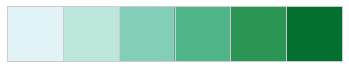

In [368]:
a = sns.palplot(sns.color_palette("BuGn"))

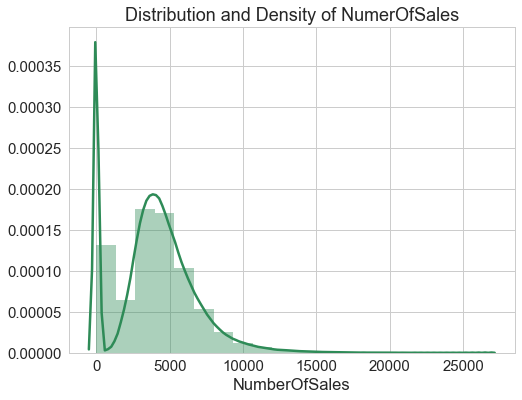

In [374]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.distplot(train['NumberOfSales'],bins=20,color='seagreen')
dp.set_title('Distribution and Density of NumerOfSales')
dp.figure.savefig('Distribution',transparent = True)

## 3. Preprocess dataset

For the NaN values of variable Event, we impute by 'No Events'. And we drop the attribute **Max_Gust_SpeedKm_h** since most of its values are missing.

In [318]:
train['Events']=train.Events.fillna('No Events')
train = train.drop(columns ='Max_Gust_SpeedKm_h')

In [319]:
Test['Events']=Test.Events.fillna('No Events')

In [320]:
Test=Test.drop(columns ='Max_Gust_SpeedKm_h')

For the rest features with null values, fill null values with the column's **most frequent value**:

In [321]:
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))
Test = Test.apply(lambda x:x.fillna(x.value_counts().index[0]))

Filter data for store 1500 and plot sales data for first 365 days. We can clearly see that this store is closed on Sundays.

Text(0,0.5,'Number of Sales')

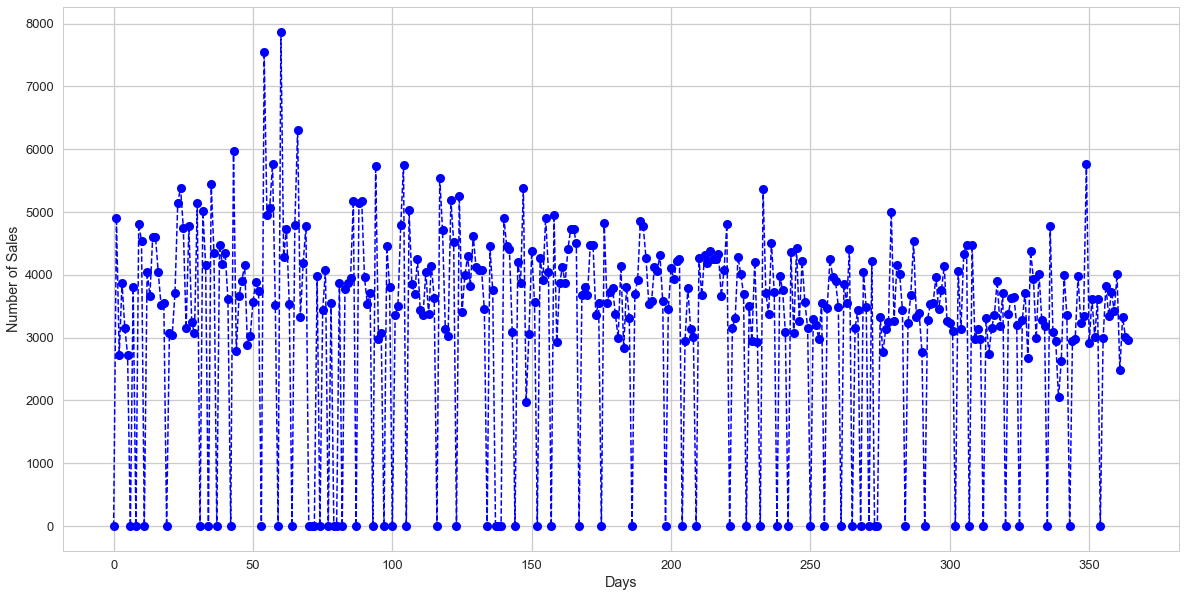

In [322]:
store_data = train[train.StoreID==1500].sort_values('Date')
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.NumberOfSales.values[:365], 'bo--')
plt.xlabel('Days')
plt.ylabel('Number of Sales')

Apparently sales are higher when they run a promotion on the same day, which makes sense.

Text(0,0.5,'NumberOfSales')

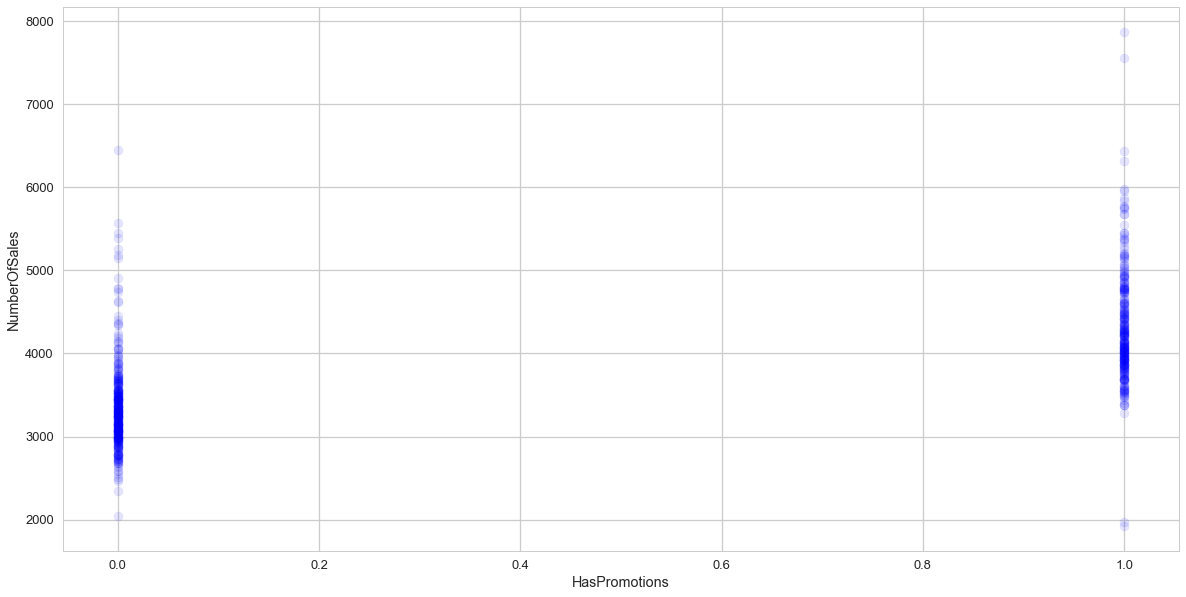

In [323]:
plt.figure(figsize=(20, 10))
plt.scatter(x=store_data[train.IsOpen==1].HasPromotions, y=store_data[store_data.IsOpen==1].NumberOfSales, alpha=0.1, color='blue')
plt.xlabel('HasPromotions')
plt.ylabel('NumberOfSales')

Convert categorical and nominal feature(s) into dummy features. The reason why we convert the feature **Region** is that there is no intrinsic order, ranking or value in **Region** and simply using numbers here would only confuse the algorithm.

In [324]:
Totaldata=pd.concat([train, Test], axis=0)

In [325]:
Totaldata.shape

(568710, 35)

In [326]:
cli_data = pd.DataFrame(Totaldata, columns=climate)
cli_data.corr(method='pearson')

Max_Dew_PointC  Max_Humidity  \
Max_Dew_PointC                    1.000000      0.059042   
Max_Humidity                      0.059042      1.000000   
Max_Sea_Level_PressurehPa        -0.112184      0.000897   
Max_TemperatureC                  0.867481     -0.202656   
Max_VisibilityKm                  0.155197     -0.190414   
Max_Wind_SpeedKm_h               -0.052752     -0.164674   
Mean_Dew_PointC                   0.980450      0.074916   
Mean_Humidity                    -0.147235      0.698788   
Mean_Sea_Level_PressurehPa       -0.053368     -0.011503   
Mean_TemperatureC                 0.922983     -0.204736   
Mean_VisibilityKm                 0.096690     -0.455648   
Mean_Wind_SpeedKm_h              -0.188280     -0.242958   
Min_Dew_PointC                    0.935280      0.073018   
Min_Humidity                     -0.225202      0.477641   
Min_Sea_Level_PressurehPa        -0.004053     -0.020018   
Min_TemperatureC                  0.920079     -0.182555   
Min_VisibilitykM                  0.053167     -0.540187   
Precipitationmm                   0.176954      0.125429   

                            Max_Sea_Level_PressurehPa  Max_TemperatureC  \
Max_Dew_PointC                              -0.112184          0.867481   
Max_Humidity                                 0.000897         -0.202656   
Max_Sea_Level_PressurehPa                    1.000000         -0.026412   
Max_TemperatureC                            -0.026412          1.000000   
Max_VisibilityKm                            -0.018822          0.195831   
Max_Wind_SpeedKm_h                          -0.213137         -0.088048   
Mean_Dew_PointC                             -0.118925          0.842154   
Mean_Humidity                               -0.072461         -0.551696   
Mean_Sea_Level_PressurehPa                   0.969187          0.047812   
Mean_TemperatureC                           -0.077063          0.969349   
Mean_VisibilityKm                            0.029286          0.316601   
Mean_Wind_SpeedKm_h                         -0.201579         -0.250588   
Min_Dew_PointC                              -0.124970          0.786999   
Min_Humidity                                -0.085898         -0.611932   
Min_Sea_Level_PressurehPa                    0.906140          0.100332   
Min_TemperatureC                            -0.135417          0.852582   
Min_VisibilitykM                             0.034206          0.312124   
Precipitationmm                             -0.161517          0.039891   

                            Max_VisibilityKm  Max_Wind_SpeedKm_h  \
Max_Dew_PointC                      0.155197           -0.052752   
Max_Humidity                       -0.190414           -0.164674   
Max_Sea_Level_PressurehPa          -0.018822           -0.213137   
Max_TemperatureC                    0.195831           -0.088048   
Max_VisibilityKm                    1.000000            0.108436   
Max_Wind_SpeedKm_h                  0.108436            1.000000   
Mean_Dew_PointC                     0.137765           -0.083640   
Mean_Humidity                      -0.273026           -0.077385   
Mean_Sea_Level_PressurehPa         -0.041629           -0.290831   
Mean_TemperatureC                   0.205061           -0.050992   
Mean_VisibilityKm                   0.571481            0.036671   
Mean_Wind_SpeedKm_h                 0.093978            0.813464   
Min_Dew_PointC                      0.122108           -0.103699   
Min_Humidity                       -0.337809           -0.040604   
Min_Sea_Level_PressurehPa          -0.058611           -0.337808   
Min_TemperatureC                    0.188588            0.003239   
Min_VisibilitykM                    0.261616            0.087054   
Precipitationmm                     0.108596            0.142743   

                            Mean_Dew_PointC  Mean_Humidity  \
Max_Dew_PointC                     0.980450      -0.147235   
Max_Humidity                       0.074916 

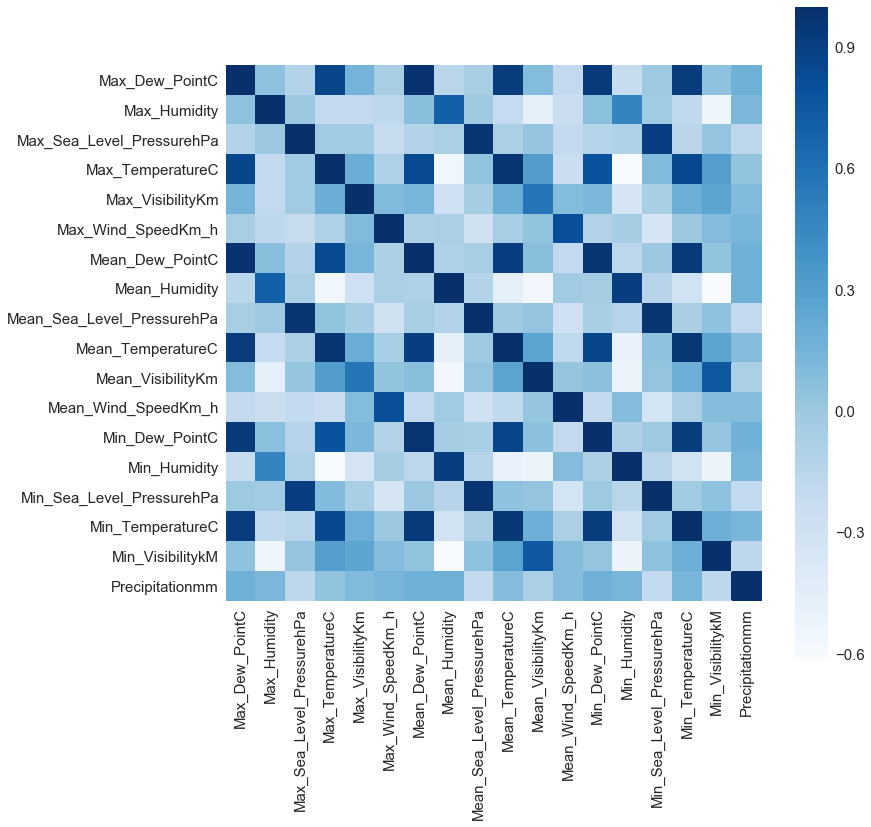

In [349]:
cli_data = pd.DataFrame(Totaldata, columns=climate)
cov=cli_data.corr(method='pearson')
plt.figure(figsize = (12,12))
h=sns.heatmap(cov,square=True,annot=False,cmap="Blues",cbar=True,xticklabels=True, yticklabels=True)

h.figure.savefig('heatmap',transparent = True)

Since the climate related variables looks  We do PCA on the climate related features and use the first five PCs to proceed our analysis for the s

In [328]:
climate =['Max_Dew_PointC','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC',
          'Max_VisibilityKm','Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa',
          'Mean_TemperatureC','Mean_VisibilityKm','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity',
          'Min_Sea_Level_PressurehPa','Min_TemperatureC','Min_VisibilitykM','Precipitationmm']
x = pd.DataFrame(Totaldata, columns=climate)
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=6)
newdata = pca.fit_transform(x)

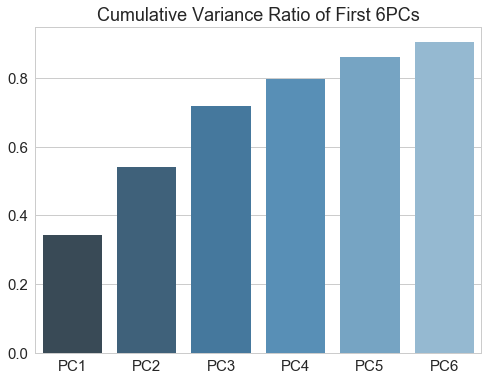

In [329]:
x=pca.components_
explained_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))  # Set figsize to increase size of figure
# Cumulative importances
cumulative_importances = np.cumsum(explained_ratio)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.barplot(x=['PC1','PC2','PC3','PC4','PC5','PC6'],y=cumulative_importances,palette="Blues_d",errwidth=0.3)
dp.set_title('Cumulative Variance Ratio of First 6PCs')
#plt.bar(['PC1','PC2','PC3','PC4','PC5','PC6'], cumulative_importances)
#plt.ylabel('Cumulative Variance Ratio'); plt.title('Cumulative Variance Ratio of First 6PCs');
dp.figure.savefig('PC ratios',transparent = True)

In [330]:
Without_climate = Totaldata.drop(columns=climate)
climate_new = pd.DataFrame(data=newdata,index=Without_climate.index)
Totaldata = pd.concat([Without_climate,climate_new],axis=1)

In [331]:
Totaldata.Region.unique()

array([ 7,  0,  3,  2,  9, 10,  4,  1,  5,  6,  8])

In [332]:
Totaldata=pd.concat([train, Test], axis=0)
Totaldata.Date=pd.to_datetime(Totaldata.Date, dayfirst = True)
Totaldata['Month'] = Totaldata.Date.apply(lambda x:x.month)
Totaldata['Weekday'] = Totaldata.Date.dt.weekday_name
Totaldata['GDP_per_capita'] = Totaldata['Region_GDP']/Totaldata['Region_PopulationK']
Region = Totaldata.Region.unique()
Totaldata= Totaldata.drop(columns=['Region_GDP','Region_PopulationK'])
Totaldata2=pd.get_dummies(Totaldata, columns=['StoreType', 'AssortmentType', 'Events', 'Region', 'Month', 'Weekday'])
train2=Totaldata2.head(train.shape[0])
Test2=Totaldata2.tail(Test.shape[0])

In [337]:
train2.columns

Index(['CloudCover', 'Date', 'HasPromotions', 'IsHoliday', 'IsOpen',
       'Max_Dew_PointC', 'Max_Humidity', 'Max_Sea_Level_PressurehPa',
       'Max_TemperatureC', 'Max_VisibilityKm', 'Max_Wind_SpeedKm_h',
       'Mean_Dew_PointC', 'Mean_Humidity', 'Mean_Sea_Level_PressurehPa',
       'Mean_TemperatureC', 'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h',
       'Min_Dew_PointC', 'Min_Humidity', 'Min_Sea_Level_PressurehPa',
       'Min_TemperatureC', 'Min_VisibilitykM', 'NearestCompetitor',
       'NumberOfCustomers', 'NumberOfSales', 'Precipitationmm',
       'Region_AreaKM2', 'StoreID', 'WindDirDegrees', 'GDP_per_capita',
       'StoreType_Hyper Market', 'StoreType_Shopping Center',
       'StoreType_Standard Market', 'StoreType_Super Market',
       'AssortmentType_General', 'AssortmentType_With Fish Department',
       'AssortmentType_With Non-Food Department', 'Events_Fog',
       'Events_Fog-Rain', 'Events_Fog-Rain-Hail',
       'Events_Fog-Rain-Hail-Thunderstorm', 'Events_Fog-Rain-Sn

## 4. Split the train dataset into subtrain dataset and subtest dataset

Drop 3 features:
- **StoreID**: The store number doesn't in itself predict sales. E.g. a higher store number says nothing about the sales.
- **Date**: Date could be transformed into days, but it's not useful for the moment.
- **NumberOfCustomers**: In test.csv we won't have this feature later to make predictions. Which is obvious as we don't know the number of customers on a given day in the future.

Split train dataset further into train and test dataset.

In [333]:
X_train, X_test, y_train, y_test = train_test_split(
  train2.drop([ 'NumberOfSales', 'StoreID', 'Date', 'NumberOfCustomers'], axis=1),
  train2.NumberOfSales,
  test_size=0.3,
  random_state = 42 )

## 5. Model comparision

Evaluate algorithm on standardized data

### 5.1 Linear regression model

We will evaluate the following linear algorithms: Linear Regression(LR), Lasso Regression (LASSO), ElasticNet(EN), Classification and Regression Trees(CART).

In [334]:
models = []
models.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
models.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
models.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
models.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART',DecisionTreeRegressor())])))

### 5.2 Ensemble Methods

We will evaluate the following ensemble methods: AdaBoost(AB), Gradient Boosting(GBM), Random Forest(RF), Extra Trees (ET).

In [335]:
models.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
models.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
models.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
models.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))
#models.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()), ('XGB', XGBRegressor())])))

### 5.3 Compare all models

In [336]:
names=[]
results=[]
for name, model in models:
    model.fit(X_train, y_train)
    result=model.predict(X_test)
    results.append(result)
    names.append(name)
    test = X_test.join(y_test)
    test['pred']=results[names.index(name)]
    Ertotal=0
    for i in Region:
        re='Region_'+str(i)
        Ertotal = Ertotal + sum(abs(test.loc[test[re] == 1].NumberOfSales - test.loc[test[re] == 1].pred))/sum(test.loc[test[re] == 1].NumberOfSales)
    E=Ertotal/len(Region)
    print("Model: {:20} Total Error: {:4f}".format(name, E))

Model: ScaledLR             Total Error: 0.305062
Model: ScaledLasso          Total Error: 0.304818
Model: ScaledEN             Total Error: 0.314415
Model: ScaledCART           Total Error: 0.148659


KeyboardInterrupt: 

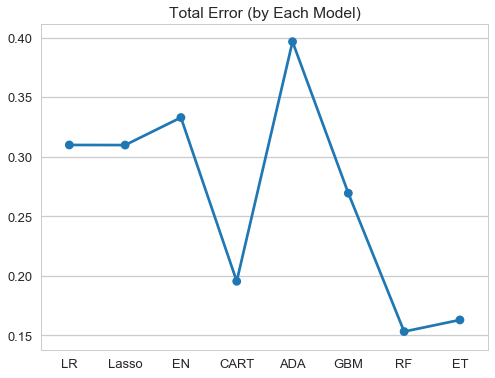

In [303]:
TotalError = [0.309984,0.309891,0.333020,0.195487,0.396728,0.269461,0.153261,0.163033]
names=['LR','Lasso','EN','CART','ADA','GBM','RF','ET']
plt.figure(figsize=(8, 6))  # Set figsize to increase size of figure
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
dp = sns.pointplot(x=names,y=TotalError)
dp.set_title('Total Error (by Each Model)')
dp.figure.savefig('Total Error',transparent = True)


Plot the Random Forest prediction result and real data (90 days).

Text(0,0.5,'Number of Sales')

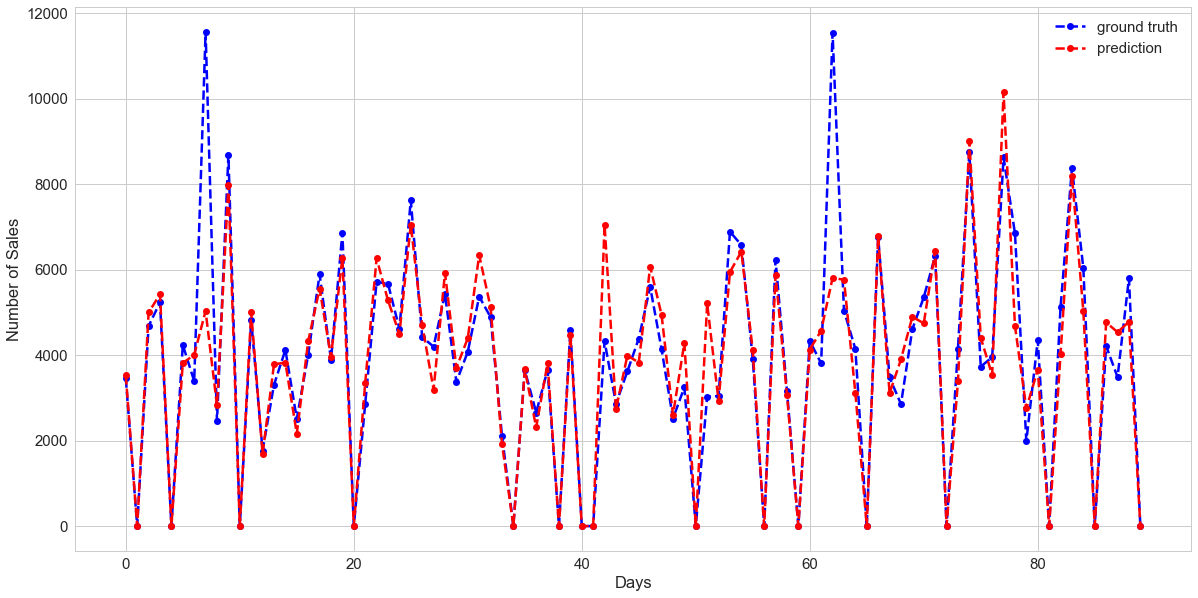

In [207]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(y_test.values[:90], 'bo--', label="ground truth")
plt.plot(results[names.index('ScaledRF')][:90], 'ro--', label="prediction")
plt.legend()
plt.xlabel('Days')
plt.ylabel('Number of Sales')

## 6. Use the best model to train

Random Forest has the best performance. We can improve it by tuning the hyper-parameters.

### 6.1 Calculate the Region Error and Total Error

Comparison above shows that **Random Forest** is the best model with the lowest Total Error. We first calculate the evalution errors.

In [208]:
test = X_test.join(y_test)
test['pred']=results[names.index('ScaledRF')]

Compute region error:

In [209]:
Ertotal=0
for i in Region:
    print('Error Region'+ str(i))
    re='Region_'+str(i)
    print( sum(abs(test.loc[test[re] == 1].NumberOfSales - test.loc[test[re] == 1].pred))/sum(test.loc[test[re] == 1].NumberOfSales))
    Ertotal = Ertotal + sum(abs(test.loc[test[re] == 1].NumberOfSales - test.loc[test[re] == 1].pred))/sum(test.loc[test[re] == 1].NumberOfSales)

Error Region7
0.15596117282363525
Error Region0
0.1640934052421044
Error Region3
0.16342258740937224
Error Region2
0.14135780977424056
Error Region9
0.15956196209508847
Error Region10
0.15031780360071917
Error Region4
0.1228307927875228
Error Region1
0.16713471354060794
Error Region5
0.16861648592581657
Error Region6
0.15061368062674804
Error Region8
0.14196299084801625


Compute total error:

In [210]:
E=Ertotal/len(Region)
print('Total Error: ', E)

Total Error:  0.1532612186067156


### 6.2 Feature Importances

Find out which features are important:

In [211]:
model_rand_forest = RandomForestRegressor(random_state=42)
model_rand_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [212]:
feature_labels = list(X_train.columns.values)
importance = model_rand_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rand_forest.estimators_],
             axis=0)
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('Variable: {:40}  Importance: {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Variable: IsOpen                                    Importance: 45.64%
Variable: NearestCompetitor                         Importance: 20.34%
Variable: HasPromotions                             Importance: 7.24%
Variable: Region_AreaKM2                            Importance: 2.93%
Variable: Month_12                                  Importance: 1.65%
Variable: Region_PopulationK                        Importance: 1.56%
Variable:                                        0  Importance: 1.55%
Variable: Region_GDP                                Importance: 1.45%
Variable:                                        1  Importance: 1.42%
Variable:                                        3  Importance: 1.40%
Variable: WindDirDegrees                            Importance: 1.39%
Variable:                                        2  Importance: 1.34%
Variable:                                        5  Importance: 1.31%
Variable:                                        4  Importance: 1.29%
Variable: StoreTyp

Text(0.5,1,'Feature Importances')

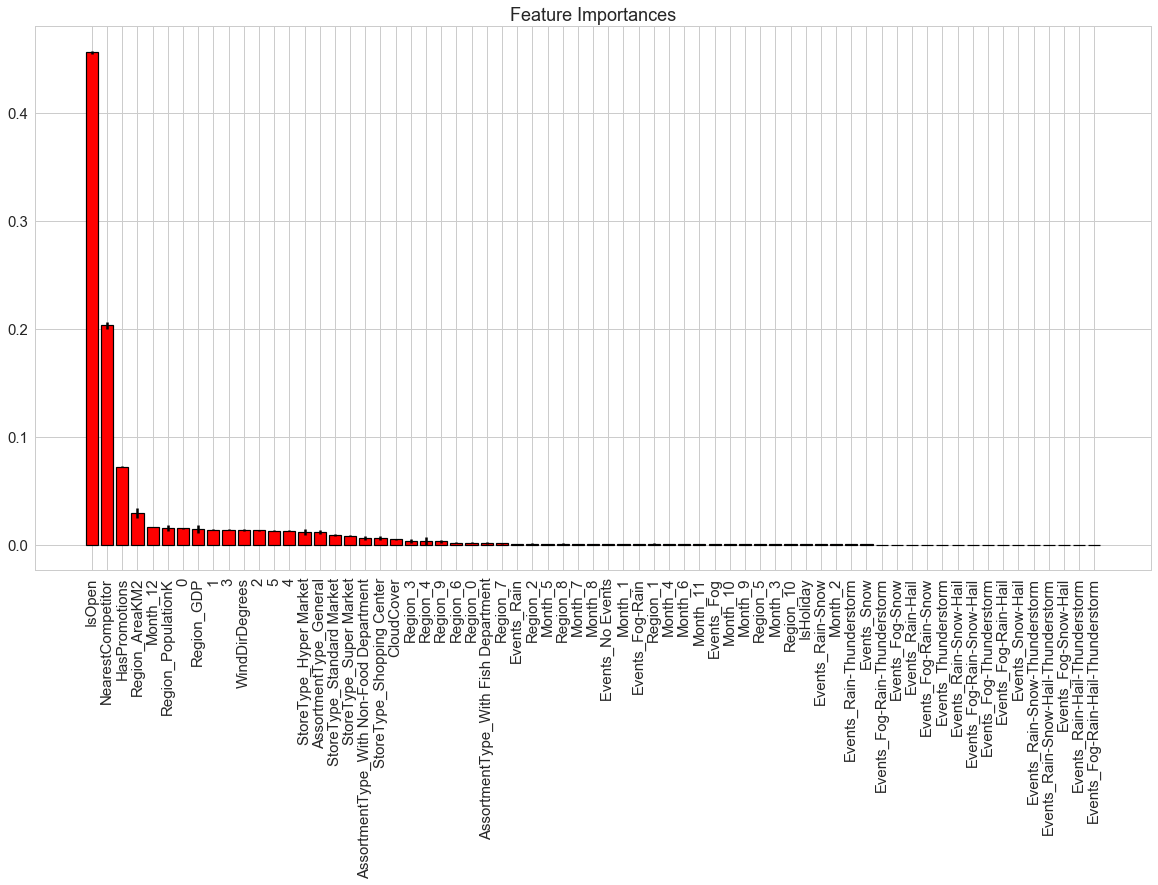

In [213]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
x_values = list(range(len(feature_indexes_by_importance)))
# List of features sorted from most to least important
sorted_features= [feature_labels[i] for i in feature_indexes_by_importance]
sorted_importances = [importance[i] for i in feature_indexes_by_importance]
plt.bar(x_values, sorted_importances, orientation = 'vertical', color = 'r', yerr=std[feature_indexes_by_importance], align="center", edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, sorted_features, rotation='vertical')
plt.title("Feature Importances")

Make a cumulative importance graph that shows the contribution to the overall importance of each additional variable. The dashed line is drawn at 99.9% of total importance.

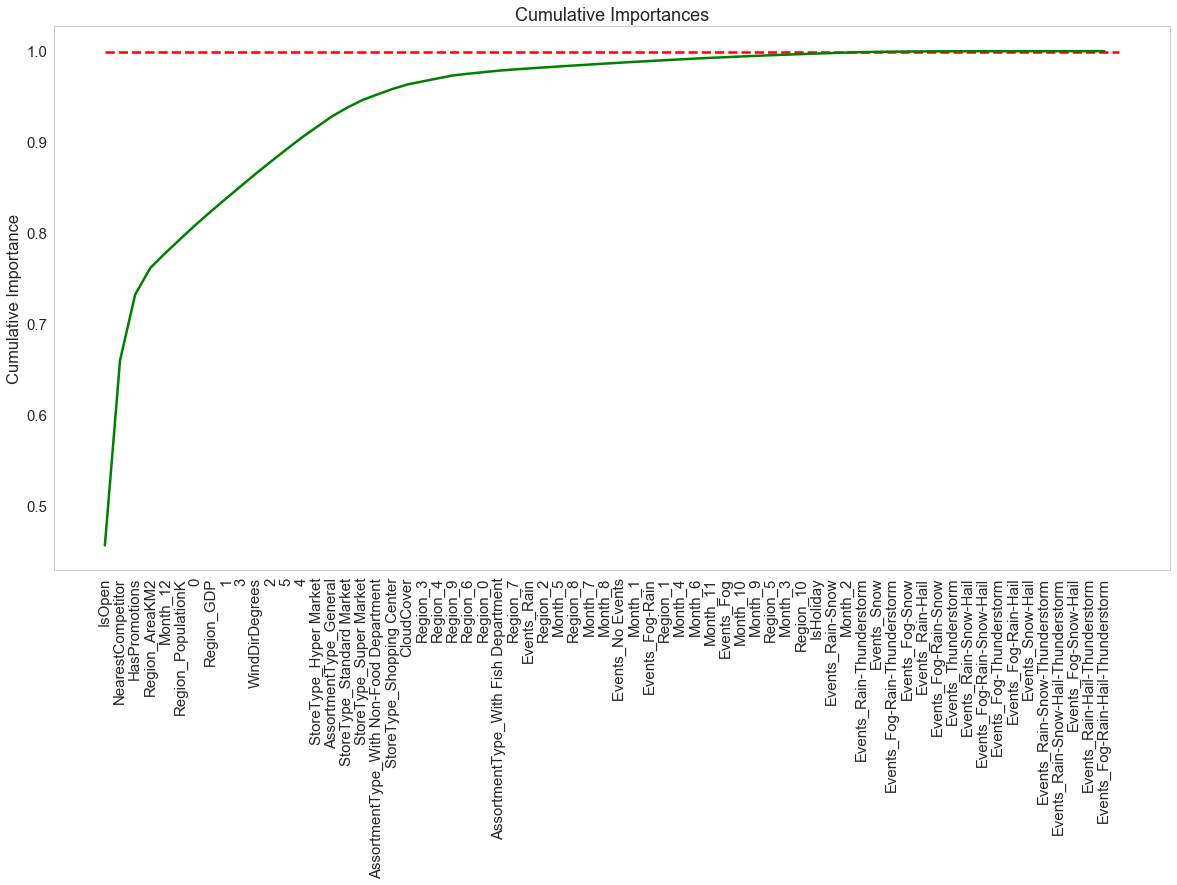

In [352]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 99.9% of importance retained
plt.hlines(y = 0.999, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.grid()
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
plt.savefig('importance',transparent = True)

Remove unimportant features. 99.9% is an arbitrary threshold, but if it leads to noticeably poor performance we can adjust the value. First, we need to find the exact number of features to exceed 99.9% importance:

In [215]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
numb=np.where(cumulative_importances > 0.999)[0][0]+1
print('Number of features for 99.9% importance:', numb)

Number of features for 99.9% importance: 52


In [216]:
# Extract the names of the most important features
important_feature_names = [feature for feature in sorted_features[0:numb]]
# Create training and testing sets with only the important features
important_train_features = X_train[important_feature_names]
important_test_features = X_test[important_feature_names]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (366114, 52)
Important test features shape: (156907, 52)


### 6.3 Tuning Random Forest Model Using Random Search Cross Validation

In [217]:
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [218]:
# Number of trees in random forest
n_estimators = [10]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
#Pseudo random number generator state
random_state = [42]
# Create the random grid
random_grid = {
                'random_state': random_state,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
             }
pprint(random_grid)

{'max_depth': [None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10],
 'random_state': [42]}


Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [219]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(oob_score = True)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(important_train_features, y_train)
rf_random.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] random_state=42, n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV] random_state=42, n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV] random_state=42, n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV] random_state=42, n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  random_state=42, n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, total=  48.0s
[CV] random_state=42, n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  random_state=42, n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, total=  48.4s
[CV]  random_state=42, n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_de

[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.7min remaining:   29.8s


[CV]  random_state=42, n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=  47.8s
[CV]  random_state=42, n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=  28.8s


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.1min finished


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 10,
 'random_state': 42}

Create evaluate function:

In [220]:
def evaluate(model, train_features, train_y, test_features, test_y):
    model.fit(train_features, train_y)
    test_pred=model.predict(test_features)
    test2 = test_features.join(test_y)
    test2['pred']=test_pred
    Ertotal=0
    for i in Region:
        re='Region_'+str(i)
        #print('Error Region'+ str(i))
        #print( sum(abs(test2.loc[test2[re] == 1].NumberOfSales - test2.loc[test2[re] == 1.pred))/sum(test2.loc[test2[re] == 1].NumberOfSales))
        Ertotal = Ertotal + sum(abs(test2.loc[test2[re] == 1].NumberOfSales - test2.loc[test2[re] == 1].pred))/sum(test2.loc[test2[re] == 1].NumberOfSales)
    
    E=Ertotal/len(Region)
    print('Total Error: ', E)
    return E

Compare the base model with best random model:

In [221]:
base_model = RandomForestRegressor(oob_score=True, random_state = 42)
base_accuracy = evaluate(base_model, important_train_features, y_train, important_test_features, y_test)
print('Out-of-bag estimate score: ', base_model.oob_score_)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, important_train_features, y_train, important_test_features, y_test)
print('Out-of-bag estimate score: ', best_random.oob_score_)

Total Error:  0.15368007247570892
Out-of-bag estimate score:  0.8003614448843224
Total Error:  0.1523306979862706
Out-of-bag estimate score:  0.8168908883755063


### 6.4 Tuning Random Forest Model with Grid Search Cross Validation

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [228]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'random_state': [42],
    'max_depth': [None],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3, 4, 6,8],
    'min_samples_split': [2,4,6,8],
    'n_estimators': [10]
}
# Create a based model
rf = RandomForestRegressor(oob_score = True)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

We can fit the model, display the best hyperparameters, and evaluate performance:

In [229]:
# Fit the grid search to the data
grid_search.fit(important_train_features, y_train)
grid_search.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42 
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42 
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42 
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=42 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=42, total=  48.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=42 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42, total=  51.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random

[CV] max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, random_state=42 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, random_state=42, total=  45.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, random_state=42 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.4min


[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, random_state=42, total=  45.6s
[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, random_state=42, total=  45.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, random_state=42 
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, random_state=42 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=42, total=  46.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, random_state=42 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, random_state=42, total=  46.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, random_state=42 
[CV]  max_depth=None

[CV] max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=10, random_state=42 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=10, random_state=42, total=  38.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=10, random_state=42 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=10, random_state=42, total=  38.8s
[CV]  max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=10, random_state=42, total=  38.8s
[CV]  max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=10, random_state=42, total=  39.0s
[CV]  max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=10, random_state=42, total=  38.9s


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 14.2min finished


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 10,
 'random_state': 42}

In [224]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, important_train_features, y_train, important_test_features, y_test)
print('Out-of-bag estimate score:', best_grid.oob_score_)

Total Error:  0.15363053090957524
Out-of-bag estimate score: 0.825297130595569


We have find a good combination of min_samples_leaf and min_samples_split. Now we will find a good n_estimator.

### 6.5 Further Assess the Prediction Error

Use the best combination of parameters.

In [232]:
model_rand_forest = RandomForestRegressor(n_estimators = 200, 
                                          oob_score = True, 
                                          n_jobs = -1,
                                          random_state =42, 
                                          max_features = "auto", 
                                          min_samples_leaf = 8,
                                          min_samples_split = 2)
model_rand_forest.fit(important_train_features, y_train)
y_pred_imp=model_rand_forest.predict(important_test_features)
test2 = important_test_features.join(y_test)
test2['pred']=y_pred_imp
Ertotal2=0
for i in Region:
    re='Region_'+str(i)
    #print('Error Region'+ str(i))
    #print( sum(abs(test2.loc[test2['re == 1].NumberOfSales - test2.loc[test2[re] == 1].pred))/sum(test2.loc[test2[re] == 1].NumberOfSales))
    Ertotal2 = Ertotal2 + sum(abs(test2.loc[test2[re] == 1].NumberOfSales - test2.loc[test2[re] == 1].pred))/sum(test2.loc[test2[re] == 1].NumberOfSales)
    
E2=Ertotal2/len(Region)
print('Total Error of Important Features: ', E2)
print('Out-of-bag estimate score:', model_rand_forest.oob_score_)

Total Error of Important Features:  0.15030916712397485
Out-of-bag estimate score: 0.8709939873132524


**The criterion is based on test data of two consecutive months instead of randomly selected days**. In order to have a further knowledge of the prediction error on March and April, 2018, we now choose **March and April, 2017** of the train dataset as the test data and use the ramaining part of the train dataset as the training data.

In [233]:
train2['Year'] = train2.Date.apply(lambda x:x.year)
X_test2 = train2.loc[((train2['Month_3'] == 1) ^ (train2['Month_4'] == 1)) & (train2['Year'] == 2017)].drop([ 'NumberOfSales', 'StoreID', 'Date', 'NumberOfCustomers', 'Year'], axis=1)
y_test2 = train2.loc[((train2['Month_3'] == 1) ^ (train2['Month_4'] == 1)) & (train2['Year'] == 2017)].NumberOfSales
X_train2 = train2.loc[~(((train2['Month_3'] == 1) ^ (train2['Month_4'] == 1)) & (train2['Year'] == 2017))].drop([ 'NumberOfSales', 'StoreID', 'Date', 'NumberOfCustomers', 'Year'], axis=1)
y_train2 = train2.loc[~(((train2['Month_3'] == 1) ^ (train2['Month_4'] == 1)) & (train2['Year'] == 2017))].NumberOfSales

In [234]:
model_rand_forest = RandomForestRegressor(n_estimators = 200, 
                                          oob_score = True, 
                                          n_jobs = -1,
                                          random_state =42, 
                                          max_features = "auto", 
                                          min_samples_leaf = 8,
                                          min_samples_split = 2)
model_rand_forest.fit(X_train2[important_feature_names], y_train2)
y_pred_imp2=model_rand_forest.predict(X_test2[important_feature_names])
test3=X_test2[important_feature_names].join(y_test2)
test3['pred']=y_pred_imp2

In [235]:
Ertotal3=0
for i in Region:
    re='Region_'+str(i)
    #print('Error Region'+ str(i))
    #print( sum(abs(test2.loc[test2['re == 1].NumberOfSales - test2.loc[test2[re] == 1].pred))/sum(test2.loc[test2[re] == 1].NumberOfSales))
    Ertotal3 = Ertotal3 + sum(abs(test3.loc[test3[re] == 1].NumberOfSales - test3.loc[test3[re] == 1].pred))/sum(test3.loc[test3[re] == 1].NumberOfSales)
    
E3=Ertotal3/len(Region)
print('Total Error of Important Features on March and April of 2017: ', E3)
print('Out-of-bag estimate score:', model_rand_forest.oob_score_)

Total Error of Important Features on March and April of 2017:  0.1539724013848446
Out-of-bag estimate score: 0.8752182552423045


## 7. Using the Whole Train Dataset

Train the whole train dataset:

In [ ]:
best_grid.fit(train2.drop([ 'NumberOfSales', 'StoreID', 'Date', 'NumberOfCustomers'], axis=1)[important_feature_names], 
                      train2.NumberOfSales)
predictions = best_grid.predict(Test2.drop([ 'NumberOfSales', 'StoreID', 'Date', 'NumberOfCustomers'], axis=1)[important_feature_names])

## 8. Output the Predictions

In [ ]:
test = Test2
test['pred']=predictions
test.Date = pd.to_datetime(test.Date, dayfirst = True)
test['Month'] = test.Date.apply(lambda x:x.month)

Read the submission template file:

In [ ]:
total_sales=pd.read_csv('sample_submission.csv')

In [ ]:
Stores=test.StoreID.unique()
for id in Stores:
        total_sales.at[(total_sales['StoreID']==id) & (total_sales['Month']==3), 'NumberOfSales'] = sum(test.loc[(test['StoreID'] == id) & (test['Month']==3)].pred)
        total_sales.at[(total_sales['StoreID']==id) & (total_sales['Month']==4), 'NumberOfSales'] = sum(test.loc[(test['StoreID'] == id) & (test['Month']==4)].pred)    

Save the results as csv file:

In [ ]:
total_sales.to_csv('Submission.csv')